In [1]:
!pip install gtfs-kit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started

You should consider upgrading via the 'C:\Users\User\anaconda3\envs\normal\python.exe -m pip install --upgrade pip' command.



  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7609 sha256=1cce03e9afdcea9aa6477566a299ef3f5004006b9943d912c757d1a392405cab
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b9\56\a2\f610a5e8a635d74d27c9971d6099b2521d2155169ff2d99b89
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681896 sha256=7f10be7ad398ff634a6030ed6f80815d5f92eeca807f13fea7d4858ced83ef00
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\47\15\92\e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
  Created wheel for utm: filename=utm-0.7.0-py3-none-any.whl size=6109 sha256=f8e1caa9ecef1c2978cab5848471fb0ee2b23b39775c97ecee8d8a60b13768b


  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\75\f0\dd\39dfc9436520412399934d4a8566fe5c0cb8cc2568a1196057
Successfully built json2html pycountry utm


In [9]:
!pip install gtfs_functions 

You should consider upgrading via the 'C:\Users\User\anaconda3\envs\normal\python.exe -m pip install --upgrade pip' command.


In [14]:
!pip install keplergl

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922327 sha256=7a7a0ac95189af48e40398ea8c53a6919533cdf52ee6de1ce85117edf19ca91f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\15\7f\48\aa4980536f7c9fbc783b2a191a579e73e7f74c41afc3f33c61
Successfully built keplergl


You should consider upgrading via the 'C:\Users\User\anaconda3\envs\normal\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip install datashader

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59454 sha256=6bd5c6ff9c8743af488dc0f9b8f6e10fab0ee13c574363e123953d566fafa70c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\42\ef\d7\781cf80d4146d76b3d2ed2510113d78c2643c842cc6c22918d
Successfully built datashape


You should consider upgrading via the 'C:\Users\User\anaconda3\envs\normal\python.exe -m pip install --upgrade pip' command.


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math
import geopy.distance

In [2]:
import gtfs_kit as gk

trans=(gk.read_feed("gtfs.zip", dist_units="km"))

c:\Users\User\anaconda3\envs\normal\lib\site-packages\pkg_resources\__init__.py:116: PkgResourcesDeprecationWarning: R2021b is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
trans.validate()

,type,message,table,rows
3,error,Invalid route_type; maybe has extra space char...,routes,"[281, 282, 283, 284, 285, 286, 287, 288, 289, ..."
0,warning,Unrecognized column feed_id,feed_info,[]
1,warning,Unrecognized column feed_ext_version,feed_info,[]
2,warning,Unrecognized column route_sort_order,routes,[]
4,warning,"Repeated pair (route_short_name, route_long_name)",routes,"[299, 319, 356, 357, 358, 360, 361, 363, 365, ..."
5,warning,Route has no trips,routes,"[280, 358, 359]"
9,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[24, 45, 113, 173, 291, 349, 409, 527, 645, 76..."
6,warning,Unrecognized column location_sub_type,stops,[]
7,warning,Unrecognized column stop_direction,stops,[]
8,warning,Stop has no stop times,stops,"[0, 1, 2, 3, 4, 6, 8, 9, 11, 13, 18, 27, 58, 6..."


In [8]:
trans.describe()

,indicator,value
0,agencies,"[BKK, MÁV-HÉV]"
1,timezone,Europe/Budapest
2,start_date,20221106
3,end_date,20230101
4,num_routes,372
5,num_trips,304359
6,num_stops,6090
7,num_shapes,1965
8,sample_date,20221110
9,num_routes_active_on_sample_date,351


In [6]:
import gtfs_functions as gtfs
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs("GTFS.zip")

In [35]:
x=[]
y=[]
for i in range(len(stops)):
    x.append(stops["geometry"][i].y)
    y.append(stops["geometry"][i].x)

In [33]:
y=stops["geometry"][0].x

19.039318

In [21]:
stops

,stop_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry
0,003209,Batthyány tér,09001,NaN,NaN,09001,NaN,NaN,POINT (19.03932 47.50678)
1,004903,Örs vezér tere,19795,NaN,NaN,19795,NaN,NaN,POINT (19.13719 47.50359)
2,007736,Gödöllő,19870,NaN,NaN,19870,NaN,NaN,POINT (19.35779 47.59334)
3,007817,Márta utca,NaN,NaN,NaN,NaN,2.0,160,POINT (18.92950 47.42918)
4,007877,Bíróság,NaN,NaN,NaN,NaN,1.0,-78,POINT (18.97806 47.51954)
...,...,...,...,...,...,...,...,...,...
5383,F04834,Tetra Pak,NaN,NaN,NaN,NaN,2.0,-49,POINT (18.90352 47.45783)
5384,F04835,Budaörsi lakótelep,NaN,NaN,NaN,NaN,1.0,56,POINT (18.94090 47.45569)
5385,F04836,Budaörsi lakótelep,NaN,NaN,NaN,NaN,1.0,72,POINT (18.94063 47.45564)
5386,F04837,Lejtő utca,NaN,NaN,NaN,NaN,1.0,-81,POINT (18.93061 47.45961)


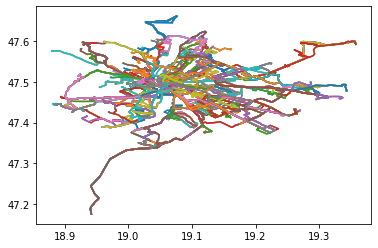

In [5]:
%matplotlib inline
for i in range(1300):
    x,y=shapes["geometry"][i].coords.xy
    plt.plot(x,y)
plt.show()

In [68]:
y,x=stops["geometry"][1].xy

In [72]:
print(x,y)

array('d', [47.503585]) array('d', [19.137192])


In [78]:
stops["geometry"][0].x

19.039318

In [71]:
geopy.distance.geodesic(I_building, (x[0],y[0])).m

6744.051581397762

In [83]:
print("stops that are in a 600m radius of Building I at BME: ")
stops_600=[]
for i,k in enumerate(stops["geometry"]):
    if geopy.distance.geodesic(I_building, (k.y,k.x)).m <600.0:
        print("\t-",stops["stop_id"][i])
        stops_600.append(stops["stop_id"][i])

stops that are in a 600m radius of Building I at BME: 
	- 008280
	- 009179
	- 049597
	- 062607
	- 062608
	- 062620
	- 062621
	- 062622
	- 066451
	- 066452
	- 066453
	- 066454
	- 071262
	- F01986
	- F01988
	- F01989
	- F01990
	- F01991
	- F01992
	- F02153
	- F02155
	- F02222
	- F02224
	- F02225


In [97]:
#Stops that are in a 600m radius
stops_I=stops[stops["stop_id"].isin(stops_600)]
stops_I

,stop_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry
125,008280,Infopark (Pázmány Péter sétány),NaN,NaN,NaN,NaN,1.0,179,POINT (19.06433 47.46924)
388,009179,"Petőfi híd, budai hídfő",NaN,NaN,NaN,NaN,1.0,-125,POINT (19.05892 47.47680)
744,049597,BudaPart,NaN,NaN,NaN,NaN,1.0,103,POINT (19.05716 47.46844)
834,062607,Infopark (Pázmány Péter sétány),NaN,NaN,NaN,NaN,1.0,-83,POINT (19.06299 47.46985)
835,062608,Magyar tudósok körútja,NaN,NaN,NaN,NaN,1.0,81,POINT (19.06367 47.47147)
836,062620,Egyetemváros - A38 hajóállomás,NaN,NaN,NaN,NaN,1.0,167,POINT (19.06354 47.47329)
837,062621,Egyetemváros - A38 hajóállomás,NaN,NaN,NaN,NaN,1.0,-13,POINT (19.06359 47.47373)
838,062622,Magyar tudósok körútja,NaN,NaN,NaN,NaN,1.0,168,POINT (19.06386 47.47218)
897,066451,Infopark,NaN,NaN,NaN,NaN,1.0,-85,POINT (19.05972 47.46917)
898,066452,Infopark,NaN,NaN,NaN,NaN,1.0,96,POINT (19.06050 47.46907)


In [ ]:
for i,k in enumerate(stops_I["geometry"]):
    if 

In [93]:
routes

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
0,BKK,0050,5,NaN,3,"Pasaréti tér / Rákospalota, Kossuth utca",009EE3,FFFFFF,23
1,BKK,0070,7,NaN,3,"Albertfalva vasútállomás / Újpalota, Nyírpalot...",009EE3,FFFFFF,25
2,BKK,0075,7E,NaN,3,"Blaha Lujza tér M / Újpalota, Nyírpalota út",009EE3,FFFFFF,26
3,BKK,0078,7G,NaN,3,"Cinkotai autóbuszgarázs / Újpalota, Nyírpalota út",009EE3,FFFFFF,27
4,BKK,0085,8E,NaN,3,"Kelenföld vasútállomás M / Újpalota, Nyírpalot...",009EE3,FFFFFF,28
...,...,...,...,...,...,...,...,...,...
345,HEV,H9,H9,NaN,109,Örs vezér tere / Csömör,ED6E86,FFFFFF,9
346,BKK,MP53,M3,NaN,3,Göncz Árpád városközpont M / Kálvin tér M,009EE3,FFFFFF,322
347,BKK,MP531,M3A,NaN,3,Göncz Árpád városközpont M / Nyugati pályaudvar M,009EE3,FFFFFF,323
348,BKK,MP533,M3,NaN,3,Göncz Árpád városközpont M / Kőbánya-Kispest M,009EE3,FFFFFF,321


In [94]:
trips

,trip_id,route_id,service_id,direction_id,shape_id
0,C0418310,8140,C04183AHPMAA-011,0,Y701
1,C0418311,8140,C04183AHPMAA-011,1,Y702
2,C0418312,8140,C04183AHPMAA-011,0,Y701
3,C0418313,8140,C04183AHPMAA-011,1,Y702
4,C0418314,8140,C04183AHPMAA-011,0,Y701
...,...,...,...,...,...
42373,H550214_1312,H9,20858,0,1312
42374,H550716_1313,H9,20858,1,1313
42375,H55125_1312,H9,20858,0,1312
42376,H55179_1313,H9,20858,1,1313


In [95]:
shapes

,shape_id,geometry
0,0285,"LINESTRING (19.14833 47.51965, 19.14831 47.519..."
1,0803,"LINESTRING (19.08235 47.55962, 19.08243 47.559..."
2,0976,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."
3,0977,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
4,1,"LINESTRING (19.03942 47.50667, 19.03941 47.507..."
...,...,...
1295,Z545,"LINESTRING (19.01851 47.46434, 19.01864 47.464..."
1296,Z546,"LINESTRING (18.92367 47.51776, 18.92387 47.517..."
1297,Z895,"LINESTRING (18.99852 47.49470, 18.99843 47.494..."
1298,Z962,"LINESTRING (19.04937 47.51389, 19.04941 47.513..."


In [59]:
I_building=(47.47282880598328, 19.060057869533754)
radius=(47.46980543001353, 19.05407442774218)

def distance(x1,x2,y1,y2):
    a=math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return a

In [60]:
distance(I_building[1],I_building[0],radius[1],radius[0])

40.183819140054325

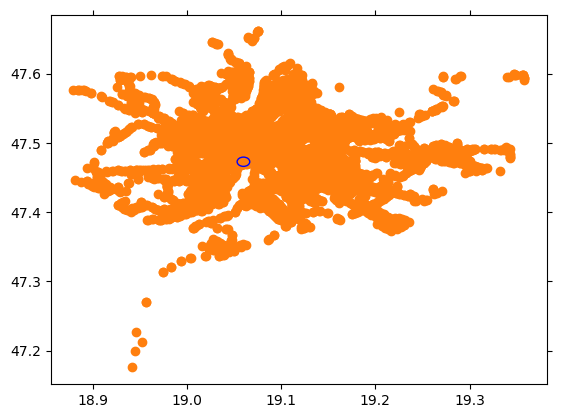

In [43]:
%matplotlib inline
circle2 = plt.Circle((I_building[1], I_building[0]), 0.00670390766103, color='b', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.scatter(I_building[1], I_building[0])
ax.scatter(y,x)


ax.add_patch(circle2)
plt.show()

In [46]:
import plotly.express as px

In [55]:
fig = px.scatter(x = [5, 7, 3, 6, 1, 9, 2],
                 y = [2, 6, 2, 1, 4, 1, 6],)
fig.show()

In [11]:
segments_gdf = gtfs.cut_gtfs(stop_times, stops, shapes)

In [12]:
segments_gdf

,route_id,direction_id,stop_sequence,start_stop_name,end_stop_name,start_stop_id,end_stop_id,segment_id,shape_id,geometry,distance_m
0,H5,0,1,Batthyány tér,"Margit híd, budai hídfő",008485,F00185,008485-F00185,1,"LINESTRING (19.03942 47.50667, 19.03941 47.507...",1021.462320
1,H5,0,2,"Margit híd, budai hídfő",Szépvölgyi út,F00185,F00139,F00185-F00139,1,"LINESTRING (19.03946 47.51585, 19.03947 47.515...",1285.218661
2,H5,0,3,Szépvölgyi út,Tímár utca,F00139,F00632,F00139-F00632,1,"LINESTRING (19.04014 47.52721, 19.04016 47.527...",884.510231
3,H5,0,4,Tímár utca,Szentlélek tér,F00632,F00624,F00632-F00624,1,"LINESTRING (19.04504 47.53436, 19.04509 47.534...",619.849337
4,H5,0,5,Szentlélek tér,Filatorigát,F00624,F00578,F00624-F00578,1,"LINESTRING (19.04718 47.53954, 19.04717 47.539...",1397.771094
...,...,...,...,...,...,...,...,...,...,...,...
24337,1360,0,1,Baross utca,Fiatalság utca,F03763,F03765,F03763-F03765,WY25,"LINESTRING (19.17176 47.43986, 19.17184 47.439...",594.748766
24338,3022,1,0,Ferencváros vá. - Málenkij Robot Eh.,Mester utca / Könyves Kálmán körút,F01503,008152,F01503-008152,XG89,"LINESTRING (19.09142 47.47069, 19.09139 47.470...",607.027671
24339,3022,1,1,Mester utca / Könyves Kálmán körút,Mester utca / Könyves Kálmán körút,008152,F01507,008152-F01507,XG89,"LINESTRING (19.08373 47.46960, 19.08371 47.469...",119.969316
24340,3690,0,0,Kerékgyártó utca,Nagy Lajos király útja / Czobor utca,F02967,F02869,F02967-F02869,EZ07,"LINESTRING (19.11258 47.51891, 19.11257 47.518...",884.320863


In [13]:
cutoffs = [0,6,9,15,19,22,24]
seg_freq = gtfs.segments_freq(segments_gdf, stop_times, routes, cutoffs = cutoffs)
seg_freq.head()

,route_id,route_name,dir_id,segment_id,window,frequency,ntrips,s_st_id,s_st_name,e_st_name,max_freq,max_trips,geometry
57502,3410,41,Inbound,F02014-F02241,9:00-15:00,360,1,F02014,Andor utca,Kalotaszeg utca,30,2,"LINESTRING (19.03984 47.45571, 19.03982 47.455..."
38929,1885,188E,Inbound,044383-044381,0:00-6:00,360,1,044383,"Budakeszi, Tiefenweg utca",Dózsa György tér,15,4,"LINESTRING (18.92117 47.50356, 18.92117 47.503..."
2355,0130,13,Inbound,008479-009094,0:00-6:00,360,1,008479,Homokbánya utca,Petőfi Sándor utca,30,2,"LINESTRING (18.94103 47.39956, 18.94100 47.399..."
38930,1885,188E,Inbound,044383-F04790,0:00-6:00,360,1,044383,"Budakeszi, Tiefenweg utca","Budakeszi, Dózsa György tér",15,4,"LINESTRING (18.92117 47.50356, 18.92117 47.503..."
59244,3560,56,Inbound,F01905-091799,9:00-15:00,360,1,F01905,Budafoki elágazás,Budafok kocsiszín,15,4,"LINESTRING (19.03643 47.43546, 19.03637 47.435..."


In [16]:
import keplergl as kp

m=kp.KeplerGl(data=dict(data=seg_freq, name="Segment Frequency"), height=400)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
